In [2]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [31]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [32]:
data.index = pd.to_datetime(data.index)

In [33]:
data = data.dropna()

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [34]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [35]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [36]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [37]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [38]:
import matplotlib.pyplot as plt

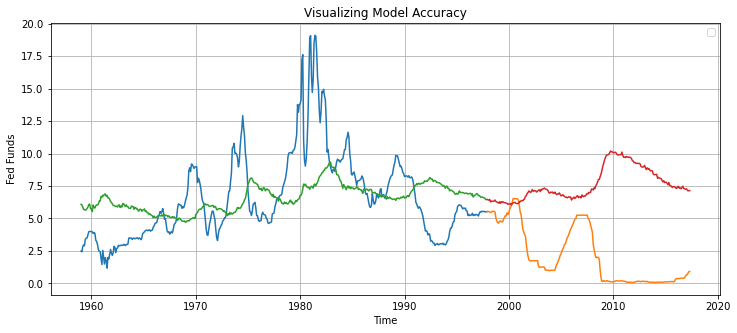

In [41]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [21]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
max_degrees = 3

DEGREE:  1


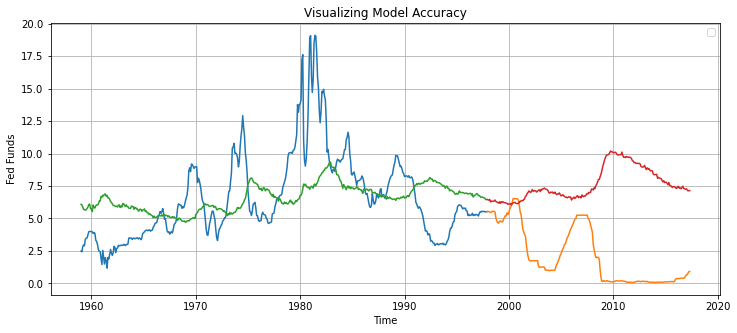

DEGREE:  2


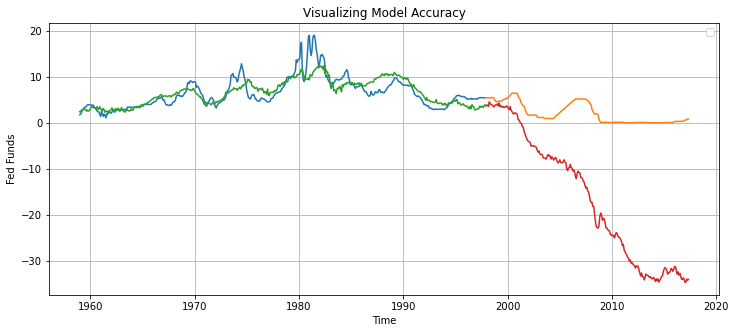

DEGREE:  3


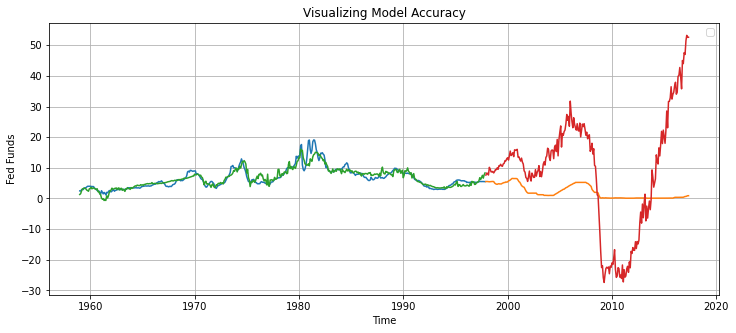

In [42]:
for degrees in range(1, max_degrees+1):
    print("DEGREE: ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))

    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(y_in.index,model1.predict(X_in_poly))
    plt.plot(y_out.index,model1.predict(X_out_poly))
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    

# 7.) State your observations :

#### As we increase the degree of our model, we tend to overfit the in-sample data, but the model performs worse for the out-sample data. This observation suggests the bias variance tradeoff.